In [63]:
%matplotlib inline
import numpy as np
import os
import sys
import math
import matplotlib.pyplot as plt
sys.path.append(os.getcwd()+'/../')
sys.path.append(os.getcwd()+'/../nonlinear_solvers')
sys.path.append(os.getcwd()+'/../stat_tests')
from lasso import lasso
from lars import LARS



rootdir=os.getcwd()

DatapointEnergies=np.loadtxt(open(rootdir+'/SR_LSDAPW92VV10_w0p3-cx0p15-4258_QZVPPD_250974_Energies.csv'))
DatapointJacobian=np.loadtxt(open(rootdir+'/SR_LSDAPW92VV10_w0p3-cx0p15-4258_QZVPPD_250974_Jacobian.csv'),delimiter=",")
RefValues=np.loadtxt(open(rootdir+'/Reference_New.csv'))
WTrainDiagonal=np.loadtxt(open(rootdir+'/WTrainDiagonal_Attempt26.csv'))
WTotalDiagonal=np.loadtxt(open(rootdir+'/WTotalDiagonal_Attempt26.csv'))

In [64]:
W = np.array(WTrainDiagonal)
W_test = np.array(WTotalDiagonal - WTrainDiagonal)

In [65]:
y = np.array(RefValues - DatapointEnergies)
#this seems correct. LARS is written in terms of X and residuals, so we should be able to just pre-weight X and y
wy = np.dot(np.diag(np.power(W,0.5)),y)
print wy.shape

(3835,)


In [66]:
X = np.array(DatapointJacobian)
#X = np.column_stack((X[:,1:45],X[:,46:90],X[:,91:135] ))
meta_space = [1,2,9,10,11,18,19,20,46,47,48,49,50,51,54,55,56,57,58,59,60,63,64,65,66,67,68,69,72,73,74,75,76,77,78,81,82,83,84,85,86,87,91,92,93,94,95,96,99,100,101,102,103,104,105,108,109,110,111,112,113,114,117,118,119,120,121,122,123,126,127,128,129,130,131,132]
X = X[:,meta_space]
gga_space = [9,18,27,36,54,63,72,81,99,108,117,126]
#X = X[:,gga_space]
wX = np.dot(np.diag(np.power(W,0.5)),X)
print wX.shape


(3835, 76)


In [67]:
metric = np.dot(np.transpose(X),np.dot(np.diag(W),X))
U,s,V = np.linalg.svd(metric) #NB svals are decreasing
print 'the eigenvalues of the metric'
print s
print(np.finfo(float).eps)
tol = 1.0E-8
n_indep = s.size
for i in s:
    if (i < tol):
        n_indep = n_indep - 1
print 'number of nonzero ',n_indep
if n_indep > 0:
    metric_inv = np.dot(U[:,:n_indep],np.dot(np.diag(s[:n_indep]**-1),np.transpose(U[:,:n_indep])))
else:
    print 'poorly posed problem in linear_regression'
    sys.exit(1)
#beta = np.dot(metric_inv,np.dot(np.transpose(X),np.dot(np.diag(W),y)))
beta = np.dot(np.linalg.pinv(metric),np.dot(np.transpose(X),np.dot(np.diag(W),y)))
print beta.shape
print beta

the eigenvalues of the metric
[  5.45722716e+01   1.39364677e+01   4.85955298e+00   1.05294554e+00
   2.71119807e-01   1.27032488e-01   3.12488249e-02   2.11304054e-02
   1.22640940e-02   5.36030169e-03   3.09266206e-03   2.19789607e-03
   1.94299201e-03   1.03096045e-03   4.07759408e-04   3.47316062e-04
   2.08373692e-04   1.17799571e-04   9.16315944e-05   7.30994142e-05
   5.33841976e-05   4.17851828e-05   3.64643346e-05   1.99153279e-05
   1.64217516e-05   1.20066426e-05   8.95217271e-06   6.23401569e-06
   4.18979689e-06   3.30812350e-06   2.65221870e-06   1.79745278e-06
   1.15099836e-06   6.09387625e-07   5.53202874e-07   4.80876458e-07
   3.29479518e-07   2.55540992e-07   1.73612849e-07   1.50550859e-07
   1.21378623e-07   8.59354769e-08   6.26577789e-08   3.77379538e-08
   2.78074821e-08   2.70508379e-08   1.86621998e-08   1.04515600e-08
   7.68302556e-09   6.12914080e-09   3.91369303e-09   3.32188793e-09
   1.68762176e-09   1.14277629e-09   8.05531289e-10   6.91407523e-10
   4

In [75]:
from sklearn import linear_model
clf = linear_model.Lars(n_nonzero_coefs=20)
clf.fit(wX,wy)
print clf.coef_
for i in range(len(clf.coef_)):
    if clf.coef_[i]<-0.0000001 or clf.coef_[i]>0.00000001:
        print meta_space[i]

[  6.07251799e-01  -1.47607404e-02   9.96527772e-01  -5.13421223e+00
  -1.48343027e+01   5.70108951e+00   0.00000000e+00   6.01595023e+00
   8.52339729e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.02863799e+01   1.81121971e-01
   0.00000000e+00  -6.28293852e+00   4.30037514e+00   0.00000000e+00
  -5.67807413e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.45204919e+01   0.00000000e+00
   0.00000000e+00   0.00000000e+00

In [85]:
clf = linear_model.LassoLars(alpha=0)
clf.fit(wX,wy)  
print clf.coef_
for i in range(len(clf.coef_)):
    if clf.coef_[i]<-0.0000001 or clf.coef_[i]>0.00000001:
        print meta_space[i]

[ 0.08891135  0.20160121  0.66126172  0.         -0.50401501  0.          0.
  2.09957722 -2.50299598 -3.15392618  0.          3.43224612 -1.0601841   0.
 -0.87061023  0.14043362  0.          0.          0.          0.          0.
  0.21719579  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -1.75627249  0.          0.          0.          0.
  0.          1.24708816  0.          0.          0.          0.
 -1.18918831  0.         -1.27211122  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          1.6374267 ]
1
2
9
11
20
46
47
49
50
54
55
63
83
92
99
101
132


In [69]:
#LARS
lars_obj = LARS(wX,wy,0)
lars_obj.train()

pseudoinverse of G was poor
pseudoinverse of G was poor
pseudoinverse of G was poor
we seem to be unable to progress though we have not included all parameters
printing indices used throughout iterations
[[], [2, 8], [2, 8, 4], [2, 8, 4, 48], [2, 8, 4, 48, 43], [2, 8, 4, 48, 43, 68], [2, 8, 4, 48, 43, 68, 75], [2, 8, 4, 48, 43, 68, 75, 0], [2, 8, 4, 48, 43, 68, 75, 0, 9], [2, 8, 4, 48, 43, 68, 75, 0, 9, 14], [2, 8, 4, 48, 43, 68, 75, 0, 9, 14, 5], [2, 8, 4, 48, 43, 68, 75, 0, 9, 14, 5, 1], [2, 8, 4, 48, 43, 68, 75, 0, 9, 14, 5, 1, 44], [2, 8, 4, 48, 43, 68, 75, 0, 9, 14, 5, 1, 44, 35], [2, 8, 4, 48, 43, 68, 75, 0, 9, 14, 5, 1, 44, 35, 7], [2, 8, 4, 48, 43, 68, 75, 0, 9, 14, 5, 1, 44, 35, 7, 36], [2, 8, 4, 48, 43, 68, 75, 0, 9, 14, 5, 1, 44, 35, 7, 36, 3], [2, 8, 4, 48, 43, 68, 75, 0, 9, 14, 5, 1, 44, 35, 7, 36, 3, 29], [2, 8, 4, 48, 43, 68, 75, 0, 9, 14, 5, 1, 44, 35, 7, 36, 3, 29, 45], [2, 8, 4, 48, 43, 68, 75, 0, 9, 14, 5, 1, 44, 35, 7, 36, 3, 29, 45, 47], [2, 8, 4, 48, 43, 68, 75, 0

In [71]:
trial_set = [2, 8, 4, 48, 43, 68, 75, 0, 9]
X_small = X[:,trial_set]
metric = np.dot(np.transpose(X_small),np.dot(np.diag(W),X_small))
beta = np.dot(np.linalg.pinv(metric),np.dot(np.transpose(X_small),np.dot(np.diag(W),y)))
res = np.dot(X_small,beta) - y
wrms = np.dot(res,np.dot(np.diag(W),res))
print wrms
print beta
print [meta_space[i] for i in trial_set] 

0.0668759810369
[  4.15001526e-01  -1.29609456e+00   1.76419985e+00  -2.14241477e+00
   2.06314046e+00  -1.08018335e+01   1.49396617e+01  -1.66792823e-03
  -1.72227289e+00]
[9, 46, 11, 99, 92, 123, 132, 1, 47]


[2.9105266668670868, 0.86183168531184062, 0.41389558441604968, -0.090158485133081348, 0.38981783060914338, 0.13376162087393145, 0.1123715450269879, 0.054184938857704992, 0.018068393121451129, -0.015266848892372826, -0.077060882114847365, 0.37770121105328835, 0.16660616629363534, -0.10971527209262001, 0.35517930301656137, 0.16000747525323311, 0.10019459555498617, 0.070349380213709525, 0.040763301231997659, -0.022007668471060345, 0.060103854163480769, -0.02247536641954526, -0.10806648122103049, 11.340691404753201, -8.0114812264570752, -2066.7449781485507, -2813719.1958114984, -3098300109.200057, -51726496992522.328]


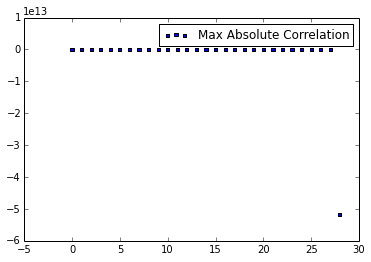

In [60]:
print lars_obj.max_corr_vs_iter
lars_obj.make_plots()

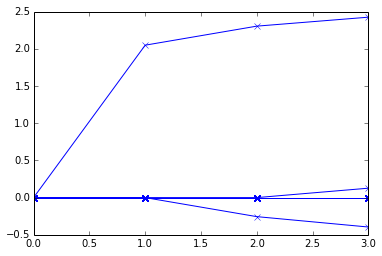

In [61]:
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(lars_obj.m):
      ax.plot(range(4),lars_obj.coefs_vs_iter[i][:4],'xb-',label="Coefficient "+str(i))
plt.show()

In [62]:
#lasso
lasso_obj = LARS(wX,wy,1)
lasso_obj.train()

KeyboardInterrupt: 

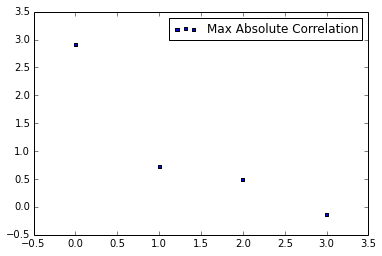

In [25]:
lasso_obj.make_plots()

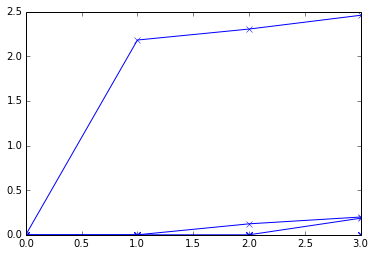

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(lasso_obj.m):
      ax.plot(range(4),lasso_obj.coefs_vs_iter[i][:4],'xb-',label="Coefficient "+str(i))
plt.show()